In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/stud.csv")

In [3]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
X = df.drop(columns=["math_score"], axis=1)

In [5]:
y = df["math_score"]

In [6]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
# Create a column transformer(which means convert
# categorical to numeric values) with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="O").columns

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# one hot transformer
oh_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("OneHotTransformer", oh_transformer, cat_features),
        (
            "StandardScaler",
            numeric_transformer,
            num_features,
        ),
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [11]:
X.shape

(1000, 19)

In [12]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

Create an Evaluate Function to give all metrics after model Training

In [14]:
def evalutate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [15]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "SVR": SVR(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "XGBRegressor": XGBRegressor(),
    # "CatBoosting Regressor": CatBoostRegressor(verbose=False)
}

model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the results and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evalutate_model(
        y_train, y_train_pred
    )

    model_test_mae, model_test_rmse, model_test_r2 = evalutate_model(
        y_test, y_test_pred
    )

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Traning set")
    print("- Root Mean Squared Error : {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error : {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("--------------------------------")

    print("Model performace for Test set")
    print("- Root Mean Squared Error : {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error : {:.4f}".format(model_test_mae))
    print("- R2 Score : {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print("=" * 35)
    print("\n")

LinearRegression
Model performance for Traning set
- Root Mean Squared Error : 5.3243
- Mean Absolute Error : 4.2671
- R2 Score: 0.8743
--------------------------------
Model performace for Test set
- Root Mean Squared Error : 5.3960
- Mean Absolute Error : 4.2158
- R2 Score : 0.8803


Ridge
Model performance for Traning set
- Root Mean Squared Error : 5.3233
- Mean Absolute Error : 4.2650
- R2 Score: 0.8743
--------------------------------
Model performace for Test set
- Root Mean Squared Error : 5.3904
- Mean Absolute Error : 4.2111
- R2 Score : 0.8806


Lasso
Model performance for Traning set
- Root Mean Squared Error : 6.5938
- Mean Absolute Error : 5.2063
- R2 Score: 0.8071
--------------------------------
Model performace for Test set
- Root Mean Squared Error : 6.5197
- Mean Absolute Error : 5.1579
- R2 Score : 0.8253


KNeighborsRegressor
Model performance for Traning set
- Root Mean Squared Error : 5.7077
- Mean Absolute Error : 4.5167
- R2 Score: 0.8555
----------------------

In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Ridge,0.880593
0,LinearRegression,0.880345
5,RandomForestRegressor,0.849043
7,AdaBoostRegressor,0.842791
8,XGBRegressor,0.827797
2,Lasso,0.825320
3,KNeighborsRegressor,0.783813
4,DecisionTreeRegressor,0.739273
6,SVR,0.728600


Linear Regression

In [17]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)

Accuracy of the model is 88.03


Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

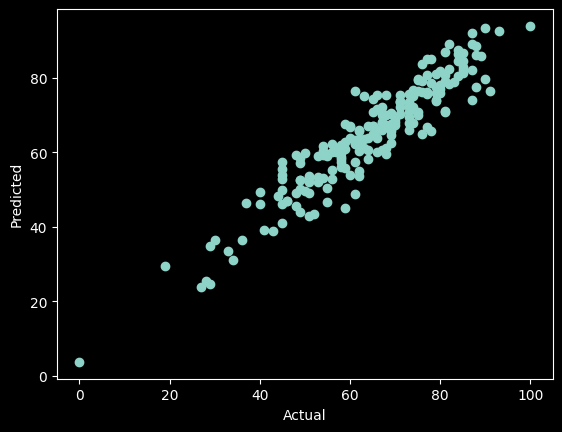

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

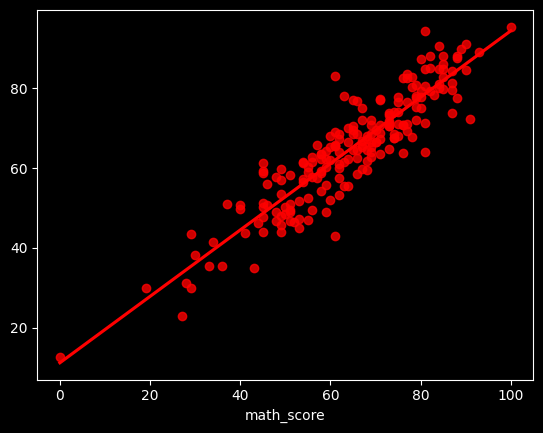

In [19]:
sns.regplot(x=y_test, y=y_test_pred, ci=None, color="red")

In [20]:
pred_df = pd.DataFrame(
    {
        "Actual_value": y_test,
        "Predicted_Value": y_test_pred,
        "Difference": y_test_pred - y_test,
    }
)

In [21]:
pred_df

,Actual_value,Predicted_Value,Difference
521,91,72.256554,-18.743446
737,53,51.827824,-1.172176
740,80,79.382545,-0.617455
660,74,74.103836,0.103836
411,84,84.875084,0.875084
...,...,...,...
408,52,46.441635,-5.558365
332,62,60.034035,-1.965965
208,74,67.617630,-6.382370
613,65,69.601791,4.601791
